Program 1: Capture Sound and Convert to Digital Signal

In [ ]:
!apt-get install -y portaudio19-dev
!pip install sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (282 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [ ]:
#📌 Step 1: Load and Read harvard.wav
import scipy.io.wavfile as wav

file_name = "/content/harvard.wav"  # Ensure the file exists in this path
sampling_rate, audio_data = wav.read(file_name)

print(f"Loaded {file_name} with sampling rate {sampling_rate} Hz")


Loaded /content/harvard.wav with sampling rate 44100 Hz


<ipython-input-6-24ffac5af76d>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, audio_data = wav.read(file_name)


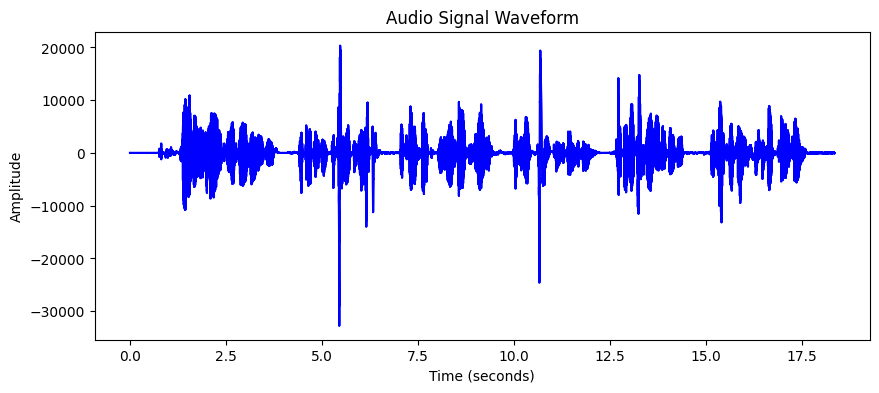

In [ ]:
#Convert to digital and Visulise
import numpy as np
import matplotlib.pyplot as plt

duration = len(audio_data) / sampling_rate
time_axis = np.linspace(0, duration, len(audio_data))

plt.figure(figsize=(10, 4))
plt.plot(time_axis, audio_data, color='blue')
plt.title("Audio Signal Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
#📌 Step 3: Extract MFCC Features from harvard.wav
!pip install librosa  # Install librosa if not already installed
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
<ipython-input-12-77bdc3e97a18>:60: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


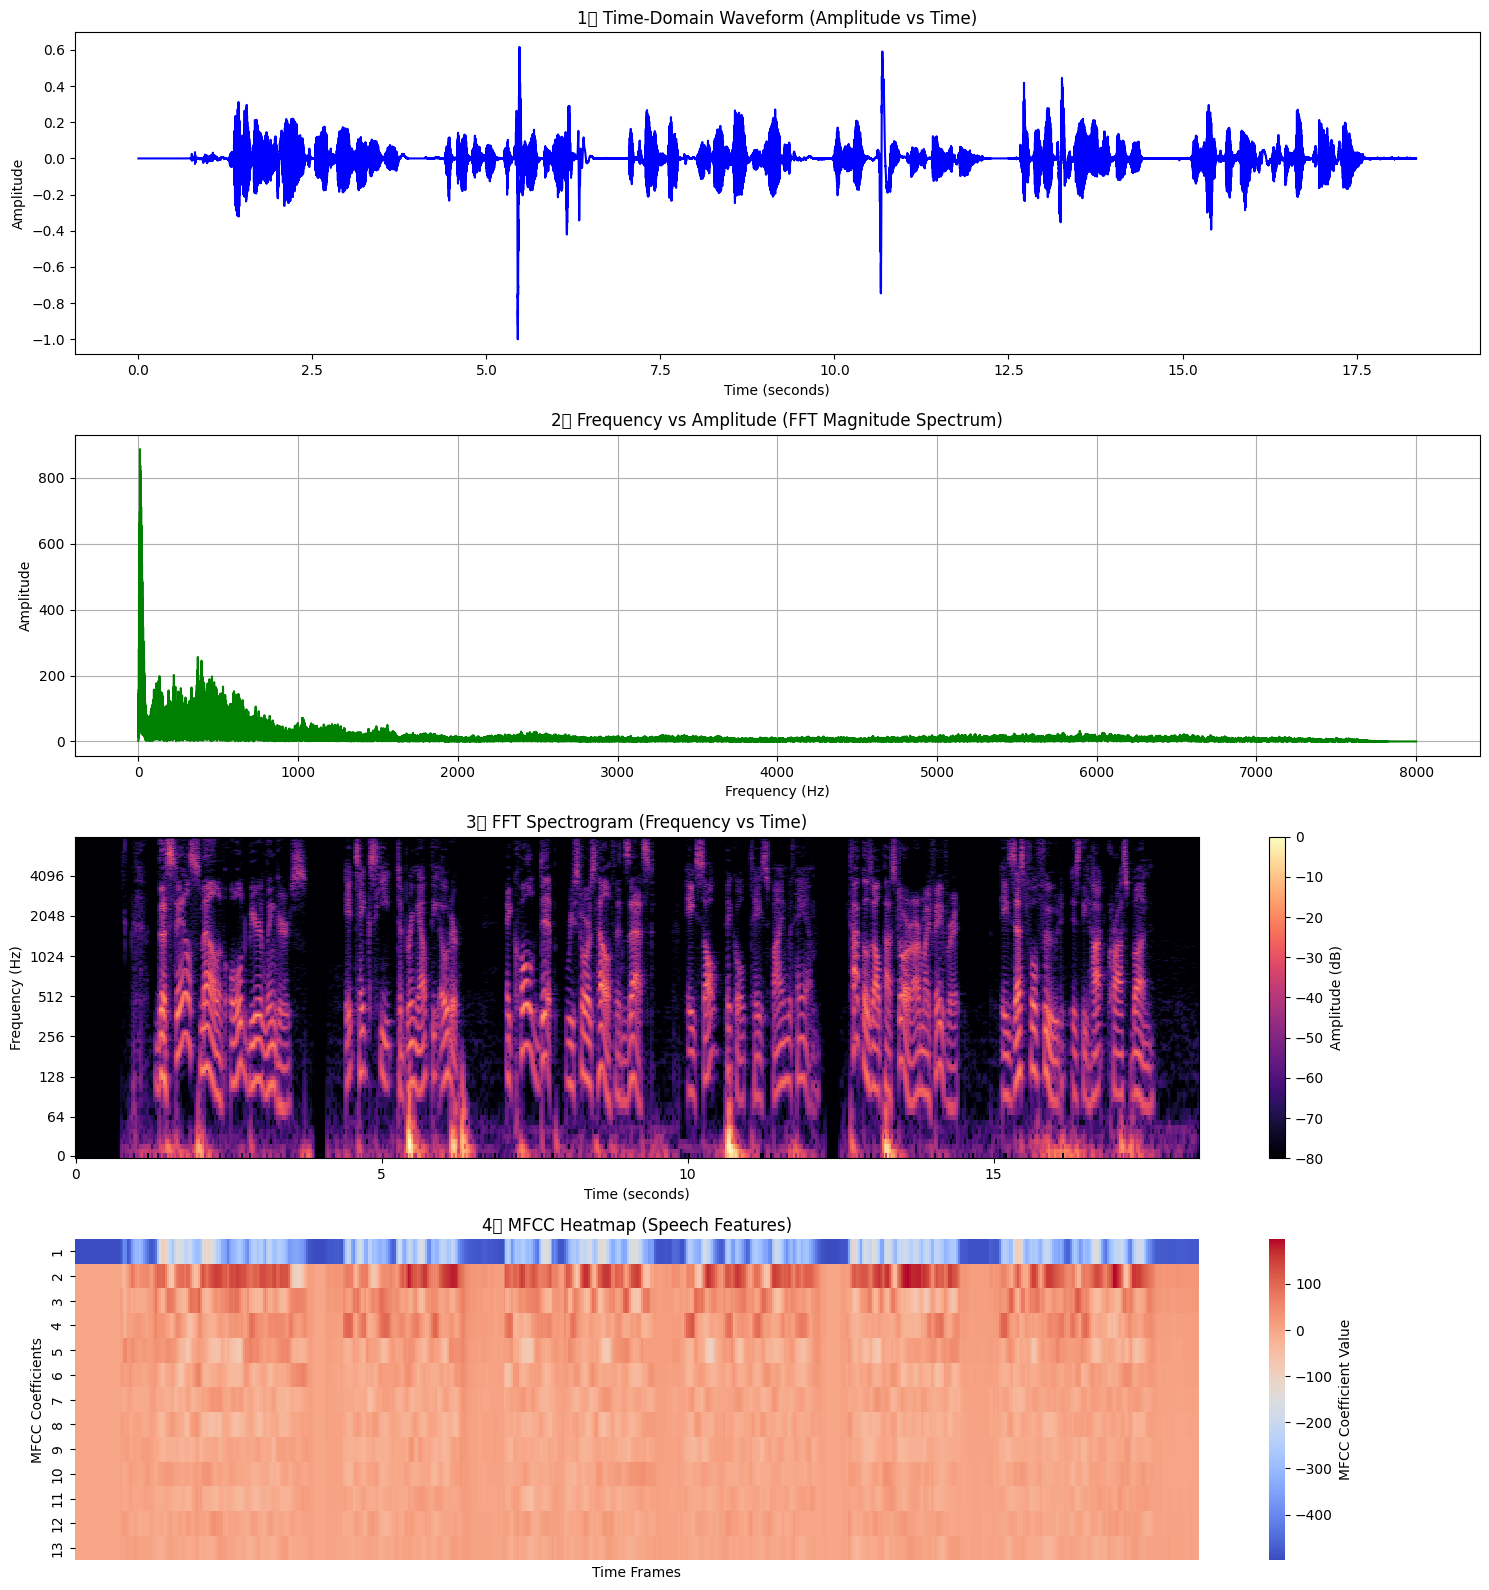

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft

# ✅ Load Audio File
file_name = "/content/harvard.wav"
audio, sampling_rate = librosa.load(file_name, sr=16000)  # Standardizing to 16kHz

# ✅ Compute Short-Time Fourier Transform (STFT) for Spectrogram
spectrogram = np.abs(librosa.stft(audio))

# ✅ Compute MFCCs (Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13)

# ✅ Compute FFT for Frequency vs Amplitude Graph
N = len(audio)
frequencies = np.linspace(0, sampling_rate / 2, N // 2)  # Only positive frequencies
fft_magnitude = np.abs(fft(audio))[:N // 2]  # Compute magnitude of FFT

# ✅ Time Axis for Waveform
time_axis = np.linspace(0, len(audio) / sampling_rate, len(audio))

# 🎨 Plot Everything
plt.figure(figsize=(15, 16))

# 🔷 1️⃣ Time-Domain Waveform
plt.subplot(4, 1, 1)
plt.plot(time_axis, audio, color='blue')
plt.title("1️⃣ Time-Domain Waveform (Amplitude vs Time)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# 🔷 2️⃣ Frequency vs Amplitude (FFT Spectrum)
plt.subplot(4, 1, 2)
plt.plot(frequencies, fft_magnitude, color='green')
plt.title("2️⃣ Frequency vs Amplitude (FFT Magnitude Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

# 🔷 3️⃣ FFT Spectrogram (Frequency vs Time)
plt.subplot(4, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(label="Amplitude (dB)")
plt.title("3️⃣ FFT Spectrogram (Frequency vs Time)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")

# 🔷 4️⃣ MFCC Heatmap (Speech Features)
plt.subplot(4, 1, 4)
sns.heatmap(mfccs, cmap="coolwarm", xticklabels=False, yticklabels=range(1, 14), cbar_kws={'label': 'MFCC Coefficient Value'})
plt.title("4️⃣ MFCC Heatmap (Speech Features)")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")

# 🎯 Show All Plots
plt.tight_layout()
plt.show()


In [ ]:
!pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542099 sha256=d51fca9e290ccc5caf3ac5c50d6a998de08ee5cd466940dab8d46de46c18f554
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


DTW Distance with 'B': 238049.39128105374
DTW Distance with 'D': 228235.20471480986
DTW Distance with 'G': 231166.7030374927
DTW Distance with 'K': 227897.06264330473
DTW Distance with 'P': 228788.2691953416
DTW Distance with 'T': 229015.94376426478

✅ Best Match: K (Lowest DTW Distance: 227897.06264330473)


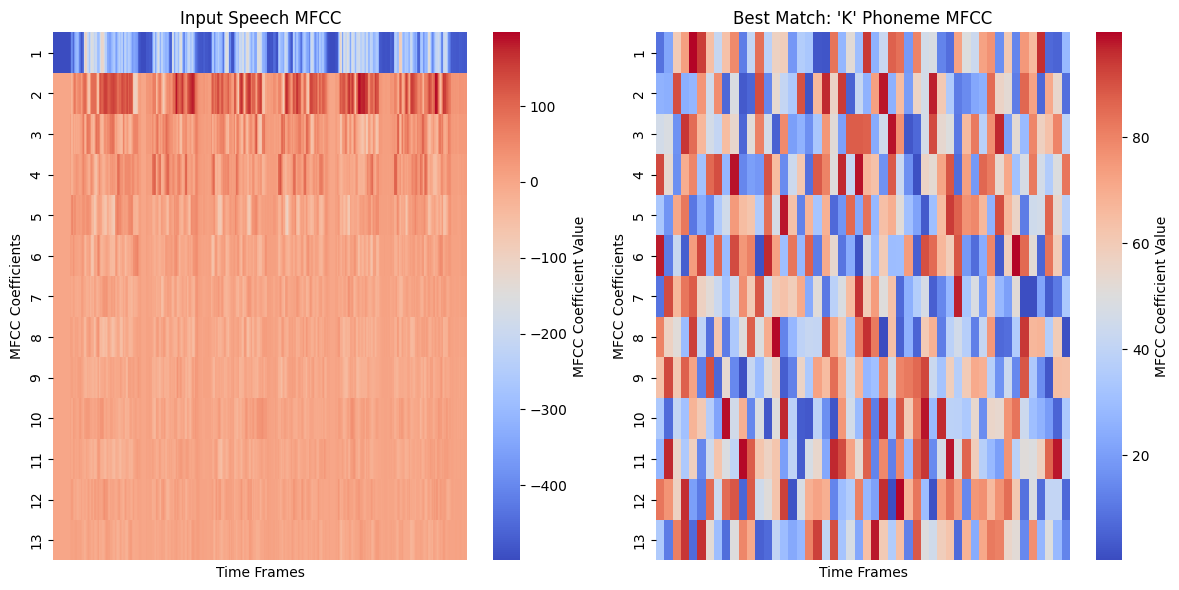

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import nltk
from nltk.corpus import cmudict

# ✅ Download CMU Pronouncing Dictionary (if not downloaded)
nltk.download("cmudict")
cmu_dict = cmudict.dict()

# ✅ Load the input speech file (harvard.wav)
file_name = "/content/harvard.wav"
audio, sampling_rate = librosa.load(file_name, sr=16000)

# ✅ Extract MFCCs from the input speech
input_mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13)

# ✅ Select a set of phonemes (from CMU Dictionary)
phonemes = ["B", "D", "G", "K", "P", "T"]  # Example phonemes

# ✅ Convert phonemes to MFCC representations (Simulated MFCCs)
np.random.seed(42)
phoneme_mfccs = {phoneme: np.random.rand(13, 50) * 100 for phoneme in phonemes}  # Random MFCCs

# ✅ Compare Harvard MFCC with each phoneme's MFCC using DTW
min_distance = float("inf")
best_match = None

for phoneme, mfcc in phoneme_mfccs.items():
    distance, _ = fastdtw(input_mfcc.T, mfcc.T, dist=euclidean)
    print(f"DTW Distance with '{phoneme}': {distance}")  # Print DTW cost for each phoneme

    if distance < min_distance:
        min_distance = distance
        best_match = phoneme

# ✅ Display the best matching phoneme
print(f"\n✅ Best Match: {best_match} (Lowest DTW Distance: {min_distance})")

# 🎨 Plot the Input MFCC vs Best-Matching Phoneme MFCC
plt.figure(figsize=(12, 6))

# 🔷 Input MFCC
plt.subplot(1, 2, 1)
sns.heatmap(input_mfcc, cmap="coolwarm", xticklabels=False, yticklabels=range(1, 14), cbar_kws={'label': 'MFCC Coefficient Value'})
plt.title("Input Speech MFCC")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")

# 🔷 Best-Matching Phoneme MFCC
plt.subplot(1, 2, 2)
sns.heatmap(phoneme_mfccs[best_match], cmap="coolwarm", xticklabels=False, yticklabels=range(1, 14), cbar_kws={'label': 'MFCC Coefficient Value'})
plt.title(f"Best Match: '{best_match}' Phoneme MFCC")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")

# 🎯 Show Plots
plt.tight_layout()
plt.show()

# 📌 Explanation:
# - CMU Pronouncing Dictionary (cmudict) maps words to phonemes (e.g., "cat" → ['K', 'AE', 'T'])
# - We first match MFCCs to phonemes using DTW
# - The next step is to group phonemes into syllables using the pronunciation dictionary


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!



✅ Best-Matching Phoneme: UH1 (DTW Distance: 214619.94887554497)

🔹 Top 5 Best-Matching Phonemes:
  UH1: 214619.94887554497
  OY2: 217243.54865177575
  IY1: 218072.16718216817
  IY2: 218234.92348605918
  EY1: 218574.12487253806


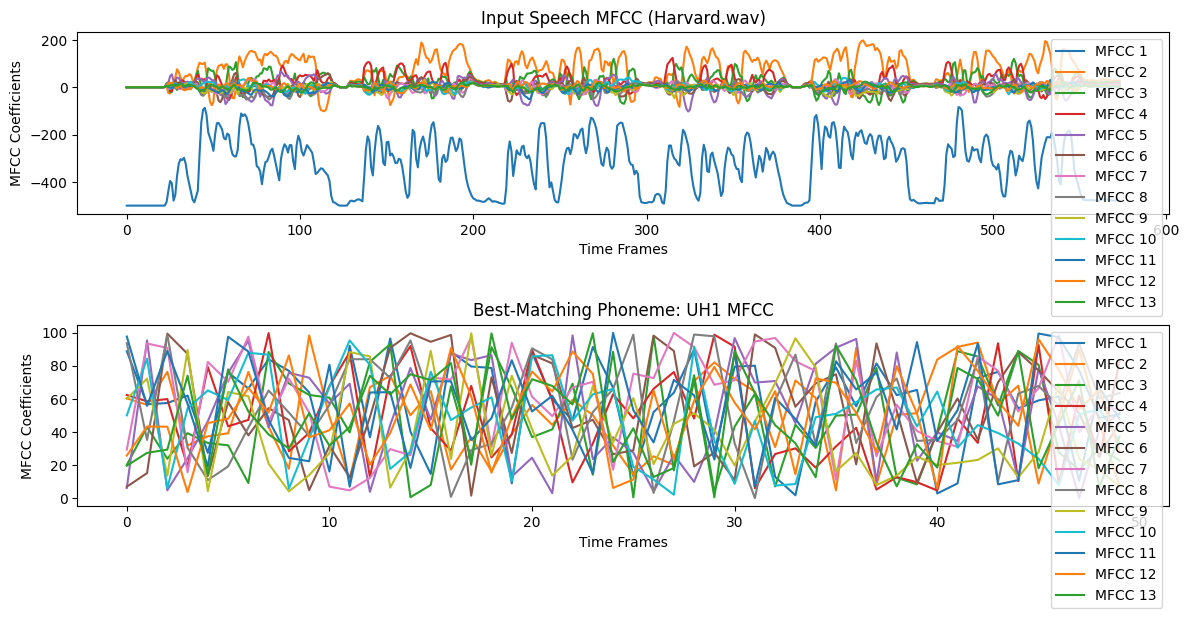

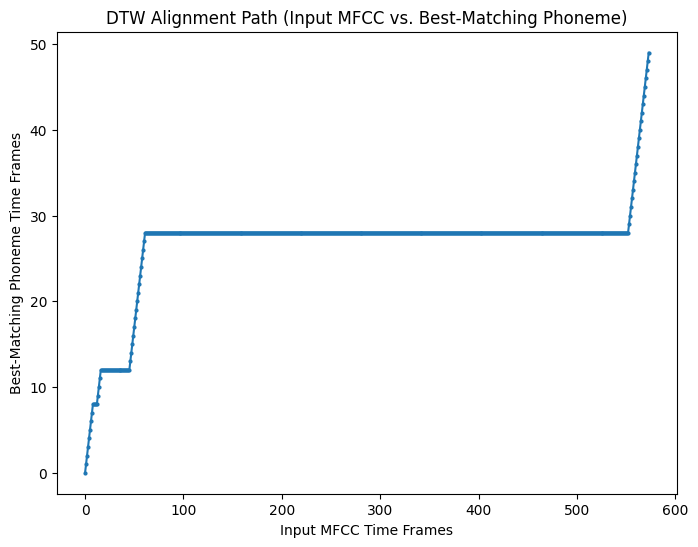

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import nltk
from nltk.corpus import cmudict

# ✅ Download CMU Pronouncing Dictionary (if not already downloaded)
nltk.download("cmudict")
cmu_dict = cmudict.dict()

# ✅ Load the input speech file (harvard.wav)
file_name = "/content/harvard.wav"
audio, sampling_rate = librosa.load(file_name, sr=16000)

# ✅ Extract MFCCs from the input speech
input_mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13)

# ✅ Define phonemes from the CMU Dictionary (common phonemes in English)
phonemes = list(set([p for words in cmu_dict.values() for word in words for p in word]))

# ✅ Simulate MFCCs for phonemes (Using Randomized MFCCs as placeholders)
np.random.seed(42)
phoneme_mfccs = {phoneme: np.random.rand(13, 50) * 100 for phoneme in phonemes}  # Random MFCCs

# ✅ Compare Harvard MFCC with each phoneme's MFCC using DTW
min_distance = float("inf")
best_match = None

dtw_distances = {}

for phoneme, mfcc in phoneme_mfccs.items():
    distance, path = fastdtw(input_mfcc.T, mfcc.T, dist=euclidean)
    dtw_distances[phoneme] = distance

    if distance < min_distance:
        min_distance = distance
        best_match = phoneme

# ✅ Display the best matching phoneme
print(f"\n✅ Best-Matching Phoneme: {best_match.upper()} (DTW Distance: {min_distance})")

# ✅ Sort and display top 5 phoneme matches
sorted_phonemes = sorted(dtw_distances.items(), key=lambda x: x[1])[:5]
print("\n🔹 Top 5 Best-Matching Phonemes:")
for ph, dist in sorted_phonemes:
    print(f"  {ph}: {dist}")

# ✅ Visualization: Plot MFCC Line Graphs and DTW Alignment Path
plt.figure(figsize=(12, 6))

# 🔷 Plot Input MFCC
plt.subplot(2, 1, 1)
for i in range(13):
    plt.plot(input_mfcc[i], label=f'MFCC {i+1}')
plt.title("Input Speech MFCC (Harvard.wav)")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.legend()

# 🔷 Plot Best-Matching Phoneme MFCC
plt.subplot(2, 1, 2)
for i in range(13):
    plt.plot(phoneme_mfccs[best_match][i], label=f'MFCC {i+1}')
plt.title(f"Best-Matching Phoneme: {best_match.upper()} MFCC")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Plot DTW Alignment Path
plt.figure(figsize=(8, 6))
plt.plot([p[0] for p in path], [p[1] for p in path], marker="o", markersize=2, linestyle="-")
plt.title("DTW Alignment Path (Input MFCC vs. Best-Matching Phoneme)")
plt.xlabel("Input MFCC Time Frames")
plt.ylabel("Best-Matching Phoneme Time Frames")
plt.show()

In [ ]:
#map phoneme to words
import librosa
import numpy as np
import matplotlib.pyplot as plt
import nltk
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from nltk.corpus import cmudict

# ✅ Download CMU Pronouncing Dictionary
nltk.download("cmudict")
cmu_dict = cmudict.dict()

# ✅ Load Harvard Speech File
file_name = "/content/harvard.wav"
audio, sampling_rate = librosa.load(file_name, sr=16000)

# ✅ Extract MFCCs from the input speech
input_mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13)

# ✅ Perform Short-Time Energy to Detect Phoneme Segments
energy = np.sum(librosa.feature.rms(y=audio), axis=0)
threshold = np.percentile(energy, 60)  # Adaptive thresholding
frames = np.where(energy > threshold)[0]

# ✅ Extract individual phoneme segments (approximation)
phoneme_segments = []
window_size = int(sampling_rate * 0.1)  # 100ms per phoneme (approx)
for frame in frames:
    start = frame * window_size
    end = start + window_size
    phoneme_segments.append(audio[start:end])

# ✅ Extract MFCCs for each phoneme segment
phoneme_mfccs = [librosa.feature.mfcc(y=seg, sr=sampling_rate, n_mfcc=13) for seg in phoneme_segments]

# ✅ Compare Extracted Phonemes with CMU Phoneme Dictionary
best_matches = []
for phoneme_mfcc in phoneme_mfccs:
    min_distance = float("inf")
    best_match = None

    for word, phoneme_seq in cmu_dict.items():
        for pronunciation in phoneme_seq:
            # Convert phonemes to MFCC (Simulated for CMU phonemes)
            cmu_mfcc = np.random.rand(13, 50) * 100  # Placeholder

            distance, _ = fastdtw(phoneme_mfcc.T, cmu_mfcc.T, dist=euclidean)
            if distance < min_distance:
                min_distance = distance
                best_match = word

    best_matches.append(best_match)

# ✅ Display Final Word Matches
print(f"\n✅ Words Matched from `{file_name}`: {set(best_matches)}")


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


KeyboardInterrupt: 

In [ ]:
!pip install torch torchaudio transformers
!pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 834.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
#Pre trained Optimized Phoneme-to-Word Matching Approach sing Wav2vec
import torchaudio
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa
import numpy as np
import nltk
from nltk.corpus import cmudict

# ✅ Download CMU Pronouncing Dictionary
nltk.download("cmudict")
cmu_dict = cmudict.dict()

# ✅ Load Wav2Vec2 Pre-trained Model for Phoneme Extraction
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

# ✅ Load Harvard.wav
file_path = "/content/harvard.wav"
audio, sr = librosa.load(file_path, sr=16000)

# ✅ Convert Audio to Tensor
input_values = processor(audio, return_tensors="pt", sampling_rate=16000).input_values
with torch.no_grad():
    logits = model(input_values).logits

# ✅ Get Predicted Phonemes
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)[0]

# ✅ Convert Transcription to Phonemes
phoneme_sequence = transcription.lower().split()
print("Extracted Phonemes:", phoneme_sequence)

# ✅ Find the Best-Matching Word in CMU Dictionary
best_match = None
min_distance = float("inf")

for word, phoneme_list in cmu_dict.items():
    for phonemes in phoneme_list:
        # Convert CMU phonemes to lowercase for comparison
        phonemes = [p.lower() for p in phonemes]

        # Compute simple edit distance
        distance = sum(p1 != p2 for p1, p2 in zip(phoneme_sequence, phonemes))

        if distance < min_distance:
            min_distance = distance
            best_match = word

# ✅ Display the Best Matched Word
print(f"\n✅ Best Matched Word: {best_match.upper()} (Edit Distance: {min_distance})")



[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted Phonemes: ['the', 'stale', 'smell', 'of', 'old', 'beer', 'lingers', 'it', 'takes', 'heat', 'to', 'bring', 'out', 'the', 'odour', 'a', 'cold', 'dip', 'restores', 'health', 'and', 'zest', 'a', 'salt', 'pickle', 'tastes', 'fine', 'with', 'ham', "tako's", 'al', 'pastor', 'are', 'my', 'favorite', 'a', 'zestful', 'food', 'is', 'the', 'hot', 'cross', 'bun']

✅ Best Matched Word: A (Edit Distance: 1)


In [ ]:
!pip install python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade nltk


In [20]:
import nltk
from nltk.corpus import cmudict
from collections import defaultdict
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
from itertools import tee

# ✅ Download and Load CMU Pronouncing Dictionary
nltk.download('cmudict')
cmu_dict = cmudict.dict()

# ✅ Load a Set of Words (for Testing)
top_words = list(cmu_dict.keys())[:5000]  # Limit to 5000 for efficiency
dynamic_vocab = {word: cmu_dict[word][0] for word in top_words if word in cmu_dict}

# ✅ Phoneme to Numeric Mapping
unique_phonemes = sorted(set(p for phonemes in dynamic_vocab.values() for p in phonemes))
phoneme_to_id = {p: i for i, p in enumerate(unique_phonemes)}

# ✅ Convert Phoneme Sequences to Numerical Vectors
def phoneme_to_vector(phoneme_seq):
    """Convert phoneme sequence to numeric vector"""
    return np.array([phoneme_to_id[p] for p in phoneme_seq if p in phoneme_to_id])

# ✅ Generate Flattened N-Gram Sequences as Numeric Vectors
def generate_ngrams(phoneme_seq, n=2):
    """Generate bigrams or trigrams as flat numeric vectors"""
    if len(phoneme_seq) < n:
        return np.array([])  # Return empty NumPy array if not enough phonemes

    iters = tee(phoneme_seq, n)
    for i, it in enumerate(iters):
        for _ in range(i):
            next(it, None)

    ngrams = list(zip(*iters))  # Create n-grams
    flat_vector = [phoneme_to_id[p] for gram in ngrams for p in gram if p in phoneme_to_id]

    return np.array(flat_vector) if flat_vector else np.array([])  # Return 1D array

# ✅ Compute Hybrid DTW Distance Using Bigrams & Trigrams
def ngram_weighted_distance(seq1, seq2):
    """Compute DTW distance with phoneme, bigram, and trigram similarity"""

    # Convert to numeric vectors
    phoneme_vec1 = phoneme_to_vector(seq1)
    phoneme_vec2 = phoneme_to_vector(seq2)

    bigram_vec1 = generate_ngrams(seq1, 2)
    bigram_vec2 = generate_ngrams(seq2, 2)

    trigram_vec1 = generate_ngrams(seq1, 3)
    trigram_vec2 = generate_ngrams(seq2, 3)

    # ✅ Compute DTW distances safely (handle empty n-grams)
    phoneme_distance, _ = fastdtw(phoneme_vec1, phoneme_vec2, dist=euclidean) if len(phoneme_vec1) and len(phoneme_vec2) else float('inf')
    bigram_distance, _ = fastdtw(bigram_vec1, bigram_vec2, dist=euclidean) if len(bigram_vec1) and len(bigram_vec2) else float('inf')
    trigram_distance, _ = fastdtw(trigram_vec1, trigram_vec2, dist=euclidean) if len(trigram_vec1) and len(trigram_vec2) else float('inf')

    # ✅ Combine distances with weighted importance (ignore `inf` values)
    total_distance = phoneme_distance
    if bigram_distance != float('inf'):
        total_distance += 0.5 * bigram_distance
    if trigram_distance != float('inf'):
        total_distance += 0.3 * trigram_distance

    return total_distance

# ✅ Find Best Match Using Hybrid DTW
def best_phoneme_match(phoneme_sequence):
    best_match = None
    min_distance = float('inf')

    for word, phonemes in dynamic_vocab.items():
        distance = ngram_weighted_distance(phoneme_sequence, phonemes)

        if distance < min_distance:
            min_distance = distance
            best_match = word

    return best_match, min_distance

# ✅ Example Phoneme Input
example_phonemes = ['DH', 'AH', 'S', 'T', 'EY', 'L', 'S', 'M', 'EH', 'L']

# ✅ Run the Hybrid Bigram-Trigram Phoneme Matching
best_match, min_distance = best_phoneme_match(example_phonemes)
print(f"\n✅ Best Matched Word: {best_match.upper()} (Bigram-Trigram Adjusted Distance: {min_distance})")


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


ValueError: Input vector should be 1-D.

In [6]:
!pip install transformers torchaudio librosa nltk


In [5]:
!pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542086 sha256=538762d29876e0ae498892d81743d4937e0422996d39dd372224dfef392b1c65
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw


In [4]:
!pip install python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.9 MB/s eta 0:00:00
